<a href="https://colab.research.google.com/github/shmilyface/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Making_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#get lending club data
! ls
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip


LoanStats_2018Q4.csv	  LoanStats_2018Q4.csv.zip.1  sample_data
LoanStats_2018Q4.csv.zip  LoanStats_2018Q4.csv.zip.2  tmp.csv
--2019-05-03 06:33:28--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.3’

LoanStats_2018Q4.cs     [               <=>  ]  21.40M   875KB/s    in 25s     

2019-05-03 06:33:54 (871 KB/s) - ‘LoanStats_2018Q4.csv.zip.3’ saved [22444881]



In [0]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LoanStats_2018Q4.csv    


In [0]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
#load LendingClub data
import pandas as pd

pd.read_csv(filepath_or_buffer='LoanStats_2018Q4.csv')
pd.read_csv?
df = pd.read_csv(sep=',', filepath_or_buffer='LoanStats_2018Q4.csv', skiprows=1, skipfooter=2)

df.head()

df.tail()

df.shape

df.describe()

df.info()
df.dtypes.value_counts()

df.shape[0]
%timeit df.shape[0]

df.isnull().sum(axis=0).sort_values(ascending=False)/len(df)


In [0]:
#work with strings
df.dtypes.value_counts

In [0]:
df['int_rate'].head()

0     10.33%
1     23.40%
2     17.97%
3     12.98%
4     13.56%
Name: int_rate, dtype: object

In [0]:
'10.33%'[:1]

'1'

In [0]:
#convert int_rate
#def. function to remove percent signs from strings and convert to floats
def strip_percent(x_str):
  return float(x_str.strip('%')) #x_str[-1]

#apply the function to the int_rate column
df['int_rate'] = df['int_rate'].apply(strip_percent)
df['int_rate'].head()



0    10.33
1    23.40
2    17.97
3    12.98
4    13.56
Name: int_rate, dtype: float64

12.76060162146994 12.957682014350915
5.070847083428044 5.092995080869786
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


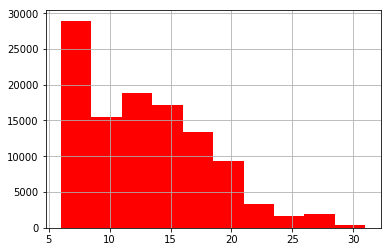

In [0]:
#clean emp_title

#look at titles
df['emp_title'].head(n=10)

#how often is emp_title null?
df['emp_title'].value_counts(dropna=False).head(20)

#clean the title handle missing data values
df['emp_title'].isnull().sum
import numpy as np
type(np.NaN)

def clean_title(title):
  if isinstance(title, str):
    return title.strip().lower()
  else:
    return 'unknown'
df['emp_title'] = df['emp_title'].apply(clean_title)
df['emp_title'].head()
df['emp_title'].value_counts(dropna=False).head(20)

#create emp_title_manager
df['emp_title'].str.contains('manager').head()

df['emp_title_manager'] = df['emp_title'].str.contains('manager')
df['emp_title_manager'].sample(10)

df.to_csv('tmp.csv', index=False)

df['emp_title'].nunique()

idx_manager = df['emp_title_manager'] == True
df_managers = df[idx_manager]
df_managers.shape

idx_nonmanager = df['emp_title_manager'] == False
df_nonmanagers = df[idx_nonmanager]
df_nonmanagers.shape

#del df_2
#del df
print(df_managers['int_rate'].mean(), df_nonmanagers['int_rate'].mean())
print(df_managers['int_rate'].std(), df_nonmanagers['int_rate'].std())

print(df_managers['int_rate'].hist(color='b'))

print(df_nonmanagers['int_rate'].hist(color='r'))

In [0]:
#work with dates
df_nonmanagers['issue_d'].head()
df_nonmanagers['issue_d'] = pd.to_datetime(df_nonmanagers['issue_d'])
df_nonmanagers['issue_d'].head()
df_nonmanagers['issue_year'] = df_nonmanagers['issue_d'].dt.year
df_nonmanagers['issue_month'] = df_nonmanagers['issue_d'].dt.month
df_nonmanagers[['issue_year', 'issue_month']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

,issue_year,issue_month
0,2018,12
1,2018,12
2,2018,12
3,2018,12
4,2018,12


In [0]:
#convert the 'term' col. from str to int64

#pd.to_numeric(df['term'], errors='coerce')
#print(df['term'])

#df.term = pd.to_numeric(df.term, errors='coerce').fillna(0).astype(np.int64)

#df.term.replace(" months", " ", inplace=True)

#Thanks for the assistance David and Martin--unfortunately, it stopped working after
#I ran it one time, and kept coming back with terms not existing, no matter what
#we did. 
#df_managers = df_managers['term'].str.strip(' months') 


#df.term.replace(" months", " ", inplace=True)

def strip_month(x_str):
  return int(x_str.strip(' months'))







In [0]:
#Thanks to Anika for assisting me with this
df_nonmanagers['term'] = df_nonmanagers['term'].apply(strip_month)

print(df_nonmanagers['term'])

Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

In [0]:
df_nonmanagers.loan_status
#create a column
df_nonmanagers['loan_status_is_great'] = df_nonmanagers['loan_status'].str.startswith('Current', 'Fully Paid')
df_nonmanagers['loan_status_is_great'] = df_nonmanagers['loan_status_is_great'].astype(int)

print(df_nonmanagers.loan_status_is_great);

print(df_nonmanagers.last_pymnt_d)

In [0]:
#Make last_pymnt_d_month and last_pymnt_d_year columns.

In [0]:
df_nonmanagers[['last_pymnt_d_month','last_pymnt_d_year']] = df.last_pymnt_d.str.split("-",expand=True,)
df_nonmanagers